In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [16]:
columns_names=["user_id","item_id","rating","timestamp"]
df=pd.read_csv("ml-100k/u.data",sep='\t',names=columns_names)

In [17]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [18]:
df.shape

(100000, 4)

In [21]:
df['user_id'].nunique()

943

In [22]:
df['item_id'].nunique()

1682

In [49]:
movies_titles=pd.read_csv("ml-100k/u.item",sep='\|',header=None)

In [51]:
movies_titles=movies_titles[[0,1]]

In [53]:
movies_titles.columns=['item_id','title']

In [54]:
movies_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [59]:
df=pd.merge(df,movies_titles,on="item_id")

In [60]:
df.tail()

,user_id,item_id,rating,timestamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


In [ ]:
##Exploratory data analysis

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [62]:
df.groupby('title').mean()['rating'].sort_values(ascending=False)

title
Marlene Dietrich: Shadow and Light (1996)                 5.000000
Prefontaine (1997)                                        5.000000
Santa with Muscles (1996)                                 5.000000
Star Kid (1997)                                           5.000000
Someone Else's America (1995)                             5.000000
Entertaining Angels: The Dorothy Day Story (1996)         5.000000
Saint of Fort Washington, The (1993)                      5.000000
Great Day in Harlem, A (1994)                             5.000000
They Made Me a Criminal (1939)                            5.000000
Aiqing wansui (1994)                                      5.000000
Pather Panchali (1955)                                    4.625000
Anna (1996)                                               4.500000
Everest (1998)                                            4.500000
Maya Lin: A Strong Clear Vision (1994)                    4.500000
Some Mother's Son (1996)                                

In [64]:
df.groupby('title').count()['rating'].sort_values(ascending=False)

title
Star Wars (1977)                                     583
Contact (1997)                                       509
Fargo (1996)                                         508
Return of the Jedi (1983)                            507
Liar Liar (1997)                                     485
English Patient, The (1996)                          481
Scream (1996)                                        478
Toy Story (1995)                                     452
Air Force One (1997)                                 431
Independence Day (ID4) (1996)                        429
Raiders of the Lost Ark (1981)                       420
Godfather, The (1972)                                413
Pulp Fiction (1994)                                  394
Twelve Monkeys (1995)                                392
Silence of the Lambs, The (1991)                     390
Jerry Maguire (1996)                                 384
Chasing Amy (1997)                                   379
Rock, The (1996)         

In [65]:
ratings=pd.DataFrame(df.groupby('title').mean()['rating'])

In [66]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [67]:
ratings['number of ratings']=pd.DataFrame(df.groupby('title').count()['rating'])

In [68]:
ratings.head()

,rating,number of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


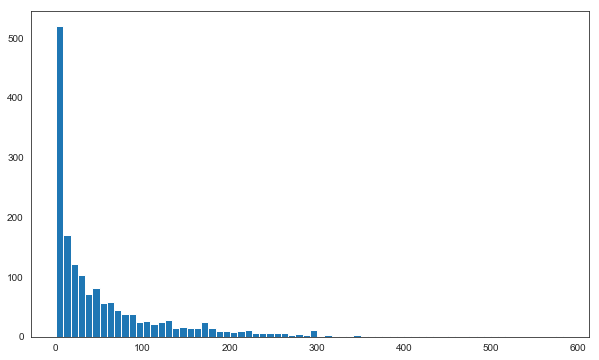

In [71]:
plt.figure(figsize=(10,6))
plt.hist(ratings['number of ratings'],bins=70)
plt.show()                                    
##very few data has been rated by various people and hence we will recommend only those

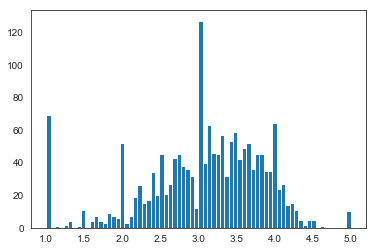

In [75]:
plt.hist(ratings['rating'],bins=70)
plt.show()                                      ##most user has rated any movie as 3

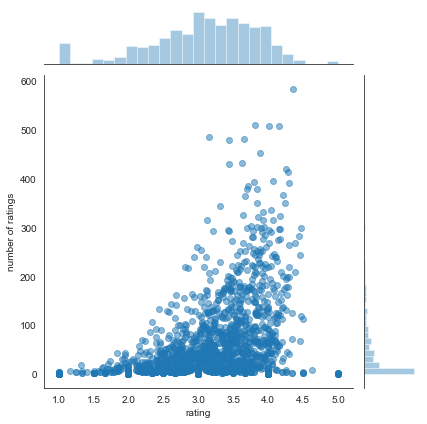

In [77]:
sns.jointplot(x='rating',y='number of ratings',data=ratings,alpha=0.5)
##we will recommend only those movie where we will find the linear treand in rating vs number of ratings

In [86]:
moviemat=df.pivot_table(index="user_id",columns="title",values="rating")

In [87]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [88]:
ratings.sort_values('number of ratings',ascending=False).head()

,rating,number of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [90]:
starwars_user_ratings = moviemat[ 'Star Wars (1977)' ]
starwars_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [93]:
similar_to_starwars=moviemat.corrwith(starwars_user_ratings)

In [94]:
similar_to_starwars.head()

title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

In [95]:
corr_starwars=pd.DataFrame(similar_to_starwars,columns=['Correlation'])

In [96]:
corr_starwars.dropna(inplace=True)

In [97]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [99]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [ ]:
corr_starwars=corr_starwars.join(ratings['number of ratings'])

In [118]:
corr_starwars[corr_starwars['number of ratings']>100].sort_values('Correlation',ascending=False)

,Correlation,number of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [122]:
def predict_movies(movie_name):
    movie_user_ratings=moviemat[movie_name]
    similar_to_movie=moviemat.corrwith(movie_user_ratings)
    corr_movie=pd.DataFrame(similar_to_movie,columns=['Correlation'])
    corr_movie.dropna(inplace=True)
    corr_movie=corr_movie.join(ratings['number of ratings'])
    predictions=corr_movie[corr_movie['number of ratings']>100].sort_values('Correlation',ascending=False)
    return predictions

In [123]:
predictions=predict_movies("Titanic (1997)")

In [124]:
predictions.head(20)

,Correlation,number of ratings
title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
William Shakespeare's Romeo and Juliet (1996),0.430243,106
"Last of the Mohicans, The (1992)",0.427239,128
Outbreak (1995),0.426237,104
Die Hard (1988),0.403124,243


In [125]:
predict_movies("Real Genius (1985)")

,Correlation,number of ratings
title,,
Real Genius (1985),1.000000,119
William Shakespeare's Romeo and Juliet (1996),0.622684,106
Seven Years in Tibet (1997),0.601338,155
Conspiracy Theory (1997),0.596611,295
In & Out (1997),0.590631,230
Mother (1996),0.587766,169
Fly Away Home (1996),0.584048,180
Murder at 1600 (1997),0.560354,218
"Long Kiss Goodnight, The (1996)",0.547592,185


In [129]:
predict_movies("William Shakespeare's Romeo and Juliet (1996)").head(20)

,Correlation,number of ratings
title,,
William Shakespeare's Romeo and Juliet (1996),1.000000,106
Real Genius (1985),0.622684,119
Hoop Dreams (1994),0.610777,117
"Abyss, The (1989)",0.609130,151
Alien: Resurrection (1997),0.598077,124
"Game, The (1997)",0.587609,251
"Craft, The (1996)",0.577989,104
GoldenEye (1995),0.564739,131
G.I. Jane (1997),0.549494,175


In [132]:
predict_movies("Hoop Dreams (1994)").head(5)

,Correlation,number of ratings
title,,
Hoop Dreams (1994),1.000000,117
"Wrong Trousers, The (1993)",0.646657,118
William Shakespeare's Romeo and Juliet (1996),0.610777,106
Chasing Amy (1997),0.569304,379
Mother (1996),0.558064,169
